# Moving beyond polynomials: Fitting arbitrary functions

In some cases, the relationship between variables in our data may not be well described by a simple polynomial function. When this happens, we need to use more flexible methods that allow us to fit arbitrary functions to our data. One such method is the `curve_fit` function from the SciPy library, which enables us to fit user-defined functions to our data using non-linear least squares optimization.

## Using `curve_fit` in SciPy:

The `curve_fit` function in SciPy is a powerful tool for fitting arbitrary functions to data using non-linear least squares optimization. It takes as input a user-defined model function, along with the observed data and optional initial parameter estimates, and returns the optimal parameter values that minimize the sum of squared residuals between the model predictions and the observed data.

### Example: Fitting a Line to the M-sigma Relation using `curve_fit`

In [1]:
# First, copy our code from last time to read in the m-sigma data and fit a line with polyfit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('m-sigma.txt')
log_BH = np.log10(df.M_bh)
BH_err = df.M_bh_err

coefficients = np.polyfit(df.sigma,log_BH,deg=1,w=1/BH_err)
x_fit = np.linspace(50,400,100)
y_fit = np.polyval(coefficients, x_fit)

In [2]:
from scipy.optimize import  curve_fit

# Define a linear model function (y = mx + b)
def linear_model(x, m, b):
    return m * x + b

# Perform curve fitting to estimate parameters (slope and intercept)
popt, pcov = curve_fit(linear_model, df.sigma, log_BH)

# Extract estimated parameters
slope, intercept = popt

We usually call the outputs of `curve_fit` `popt` and `pcov`. These represent: 
- `popt`: This variable holds the best estimates of the parameters (e.g., slope and intercept) for the fitted model. It's what we use to get the actual values of the parameters we're interested in. The ordering of `popt` matches the ordering of the paramters in our `linear_model` user defined function after the first arguement (which is the data x). 
- `pcov`: This variable represents the covariance matrix, which tells us about the uncertainty or correlation between the estimated parameters. It helps us understand how reliable our parameter estimates are. Specifically, it provides information about how much the estimated parameters vary together. If two parameters are highly correlated, changes in one may influence the estimate of the other. For now, we can ignore this. 

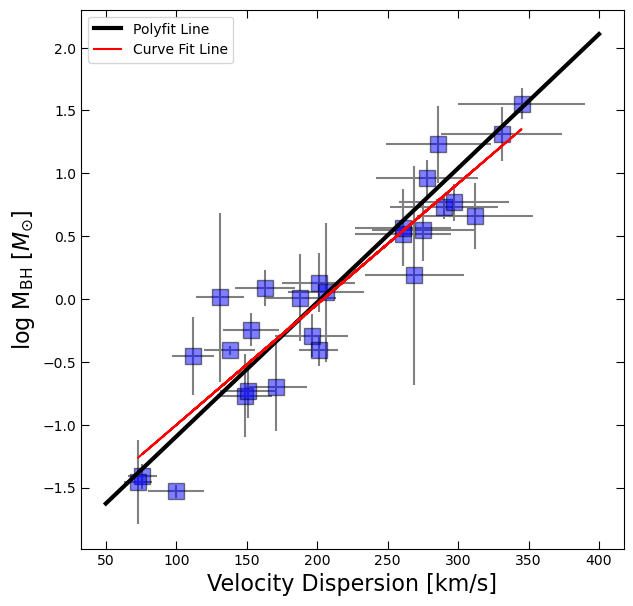

In [3]:
fig, ax = plt.subplots(figsize=(7,7))
ax.errorbar(df.sigma, log_BH, yerr=BH_err, xerr=df.sigma_err, fmt='None', color='gray')
ax.plot(df.sigma, log_BH, 's', color='blue', ms=12, alpha=0.5, mec='k')

ax.plot(x_fit, y_fit, 'k', lw=3, label = 'Polyfit Line')
ax.plot(df.sigma, linear_model(df.sigma, slope, intercept), color='red', label='Curve Fit Line')

ax.set_xlabel('Velocity Dispersion [km/s]', fontsize=16)
ax.tick_params(which='both', top=True, right=True, direction='in', length=6)
ax.set_ylabel(r'log M$_{\rm BH}$ [$M_{\odot}$]', fontsize=16)
ax.legend();

Note: these fits may be slightly different because we are not incorporating errors in the fit using `curve_fit`. 

## A Common Use-Case: Gaussian Fitting

Gaussian fitting, also known as Gaussian curve fitting or Gaussian distribution fitting, is a statistical method used to model data that follows a Gaussian (normal) distribution. A Gaussian distribution is characterized by its bell-shaped curve, which is symmetrical around the mean and describes the probability distribution of a continuous random variable. Gaussian fitting involves estimating the parameters of a Gaussian function, such as the mean, standard deviation, and amplitude, that best describe the observed data.

Gaussian fitting is important in many aspects of astronomy, as we expect many distributions to be well-described by Gaussians. A 
Gaussian can be expressed as: 
$$ f(x) = A \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

- **Mean (μ)**: The center or average value of the Gaussian distribution.
- **Standard Deviation (σ)**: The measure of the spread or dispersion of the Gaussian distribution.
- **Amplitude (A)**: The peak height or maximum value of the Gaussian curve.

::::{admonition} Exercise 1: Fitting a Gaussian to Synthetic Data
:class: tip

Using the `curve_fit` function, fit a Gaussian function to the noisy data provided below and estimate the parameters that best describe the underlying Gaussian distribution.

1. **Copy the starter code below**: Begin by copying the starter code to generate synthetic data representing noisy measurements of a Gaussian distribution. The data consists of input values (`x`) and corresponding noisy observations (`y_noise`).

2. **Define the Gaussian Model Function**: Define a Gaussian model function representing the mathematical form of a Gaussian distribution. The Gaussian function should take input variables (e.g., `x`) and parameters (e.g., mean, standard deviation, amplitude) as arguments and return the predicted values of the Gaussian distribution.

3. **Perform Curve Fitting**: Use the `curve_fit` function from the SciPy library to fit the Gaussian model function to the noisy data. Provide the input data (`x`) and noisy observations (`y_noise`) as input arguments to `curve_fit`. Optionally, you can provide initial estimates for the parameters to aid the fitting process. Look at the `curve_fit` documentation to see how to do this! 

4. **Visualize the Fitted Gaussian**: Plot the noisy data along with the fitted Gaussian distribution to visualize how well the Gaussian model fits the observed data. 

::::

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate synthetic data following a Gaussian distribution
x = np.linspace(-5, 5, 100)
y_true = np.exp(-0.5 * (x ** 2)) / np.sqrt(2 * np.pi)  # True Gaussian distribution

# Add noise to the data to simulate experimental measurements
np.random.seed(0)
y_noise = y_true + np.random.normal(loc=0, scale=0.1, size=len(x))

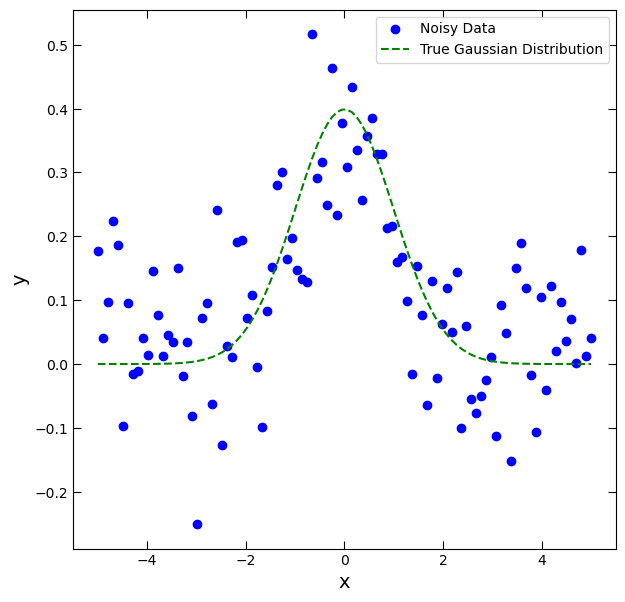

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x, y_noise, color='blue', label='Noisy Data')
ax.plot(x, y_true, linestyle='--', color='green', label='True Gaussian Distribution')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.tick_params(which='both', top=True, right=True, direction='in', length=6)
ax.legend();

::::{admonition} Exercise 2: Fitting a Gaussian to a Real Galaxy Spectrum! 
:class: tip

On slack, we will send a data file with a galaxy spectrum that has the columns `wave`, `flux`, and `ivar`. These stand for the wavelength array (which you would plot on the x-axis), the flux or intensity of emission at every given wavelength (which you would plot on the y-axis), and the inverse variance for each flux measurement. 

Load in this data, and slice the arrays to select for the H-alpha emission line (this is the largest emission line in this spectrum). Then, using your Gaussian fitting code to fit a Gaussian to the H-alpha line and report the line center and line width. 

::::